<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

Cloning into 'complex-systems-social-graph'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 121 (delta 39), reused 62 (delta 17), pack-reused 0
Receiving objects: 100% (121/121), 632.38 KiB | 10.04 MiB/s, done.
Resolving deltas: 100% (39/39), done.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
!ls

complex-systems-social-graph  sample_data


In [3]:
%cd complex-systems-social-graph/recommender_social_graph/

/content/complex-systems-social-graph/recommender_social_graph


In [4]:
!ls

abeba_methods.py  content	     metrics.py		people
beba_methods.py   graph_creation.py  models_comparison
beba_tests	  __init__.py	     multi_dimensional


Importing mandatory methods for the notebook:

In [5]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0             0.56
           1             0.26
           2            -0.7
           3            -0.54
           4            -0.5
           5            -0.12
           6            -0.06
           7            -0.44
           8            -0.46
           9            -0.96
          10            -0.78
          11             0.72
          12            -0.7
          13             0.36
          14             0.92
          15             0.1
          16             0.04
          17            -0.56
          18            -0.88
          19            -0.26
          20            -0.98
          21            -0.3
          22            -0.12
          23             0.74
          24             0.88
          25             0.56
          26             0.12
          27             0.52
          28             0.02
          29            -0.42
          30             0.4

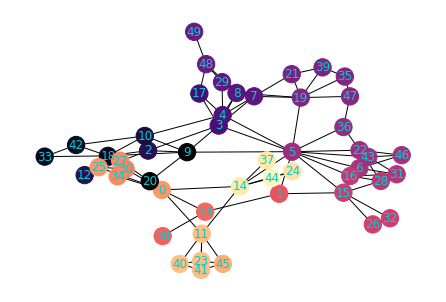

In [6]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0            0.553
           1            0.26
           2           -0.699
           3           -0.551
           4           -0.538
           5           -0.12
           6           -0.108
           7           -0.431
           8           -0.46
           9           -0.901
          10           -0.768
          11            0.72
          12           -0.7
          13            0.357
          14            0.92
          15            0.147
          16            0.04
          17           -0.56
          18           -0.877
          19           -0.26
          20           -0.98
          21           -0.331
          22           -0.122
          23            0.74
          24            0.893
          25            0.563
          26            0.133
          27            0.52
          28            0.028
          29           -0.42
          30            0.45
          31           -0

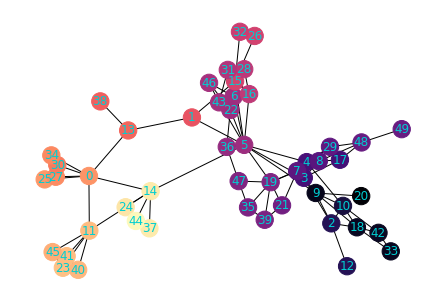

In [7]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0             0.54
           1             0.04
           2            -0.04
           3             0.26
           4            -0.34
           5             0.32
           6            -0.58
           7             0
           8            -0.64
           9            -0.86
          10             0.42
          11             0.46
          12             0.06
          13            -0.16
          14            -0.56
          15             0.78
          16             0.08
          17            -0.76
          18            -0.98
          19             0.78
          20             0.12
          21            -0.86
          22            -0.54
          23             0.5
          24            -0.52
          25             0.72
          26            -0.84
          27            -0.74
          28            -0.82
          29             0.16
          30             0.

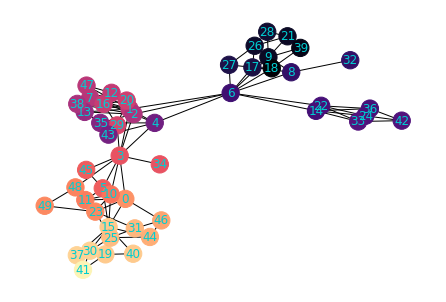

In [8]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(50, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

Starting Nodes:
  node label    opinion value
------------  ---------------
           0             0.54
           1             0.04
           2            -0.04
           3             0.26
           4            -0.34
           5             0.32
           6            -0.58
           7             0
           8            -0.64
           9            -0.86
          10             0.42
          11             0.46
          12             0.06
          13            -0.16
          14            -0.56
          15             0.78
          16             0.08
          17            -0.76
          18            -0.98
          19             0.78
          20             0.12
          21            -0.86
          22            -0.54
          23             0.5
          24            -0.52
          25             0.72
          26            -0.84
          27            -0.74
          28            -0.82
          29             0.16
          30             0.8

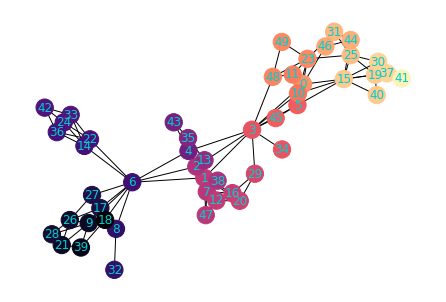

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.392
           1            0.053
           2            0.041
           3            0.258
           4            0.022
           5            0.37
           6           -0.21
           7            0.066
           8           -0.259
           9           -0.281
          10            0.388
          11            0.386
          12            0.081
          13            0.038
          14           -0.3
          15            0.442
          16            0.083
          17           -0.264
          18           -0.258
          19            0.482
          20            0.089
          21           -0.297
          22           -0.3
          23            0.383
          24           -0.3
          25            0.425
          26           -0.278
          27           -0.252
          28           -0.285
          29            0.088
          30            0.

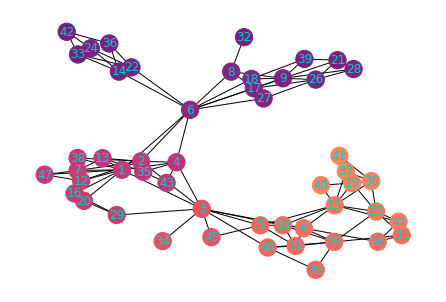

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0           -0.039
           1            0.132
           2           -0.113
           3            0.06
           4           -0.049
           5           -0.004
           6            0.137
           7            0.091
           8           -0.088
           9           -0.016
          10            0.006
          11            0.178
          12            0.105
          13            0.041
          14            0.1
          15           -0.3
          16            0.059
          17            0.099
          18            0.093
          19           -0.047
          20           -0.033
          21            0.219
          22            0.216
          23           -0.011
          24           -0.204
          25           -0.448
          26            0.133
          27            0.043
          28            0.235
          29            0.042
          30       

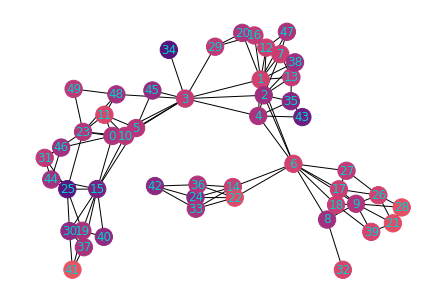

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.045
           1           -0.015
           2           -0.017
           3            0.034
           4            0.006
           5           -0.042
           6           -0.002
           7           -0.012
           8           -0.009
           9           -0.014
          10           -0.013
          11           -0.013
          12           -0.007
          13           -0.002
          14            0.017
          15            0.001
          16            0.017
          17            0.005
          18           -0.003
          19            0.037
          20           -0.023
          21           -0.013
          22            0.003
          23            0.023
          24            0.012
          25            0.003
          26           -0.014
          27           -0.038
          28           -0.07
          29           -0.018
          30    

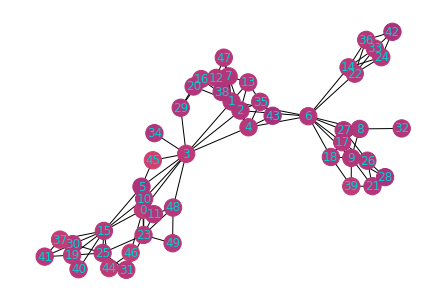

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.641
           1           -0.084
           2           -0.084
           3            0.641
           4           -0.084
           5            0.641
           6           -0.685
           7           -0.084
           8           -0.689
           9           -0.691
          10            0.641
          11            0.641
          12           -0.084
          13           -0.084
          14           -0.672
          15            0.643
          16           -0.084
          17           -0.69
          18           -0.69
          19            0.645
          20           -0.084
          21           -0.693
          22           -0.672
          23            0.641
          24           -0.671
          25            0.643
          26           -0.692
          27           -0.69
          28           -0.693
          29           -0.084
          30    

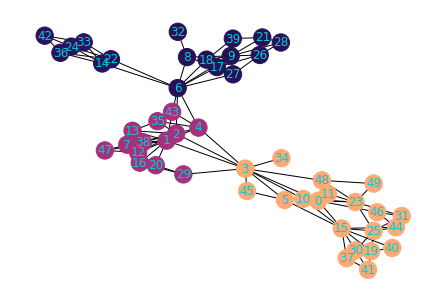

Polarisation (starting): 16.609247999999997
Polarisation (no recommender): 4.4188660431226445
Polarisation (content recommender): 1.3377246534258507
Polarisation (nudge recommender): 0.05580577347754189
Polarisation (similar recommender): 16.2839643164659


In [9]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = G.copy()
random_G = G.copy()
nudge_G = G.copy()
similar_G = G.copy()
nudge_param = {'nudge_mean': 0.0, 'nudge_std': 0.1}
similar_param = {'similar_thresh': 0.5}
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  random_G = simulate_epoch_content_recommender(random_G, 50, 50)
  nudge_G = simulate_epoch_content_recommender(nudge_G, 50, 50, 
                                               strategy="nudge", 
                                               strat_param=nudge_param)
  similar_G = simulate_epoch_content_recommender(similar_G, 50, 50, 
                                                 strategy="similar", 
                                                 strat_param=similar_param)

# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

print(f"Polarisation (starting): {polarisation(starting_G)}")
print(f"Polarisation (no recommender): {polarisation(G)}")
print(f"Polarisation (content recommender): {polarisation(random_G)}")
print(f"Polarisation (nudge recommender): {polarisation(nudge_G)}")
print(f"Polarisation (similar recommender): {polarisation(similar_G)}")